# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Goal Reached !
Goal Reached !


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

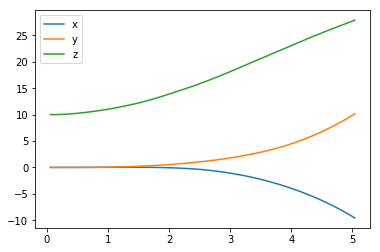

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

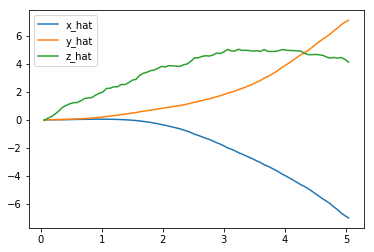

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

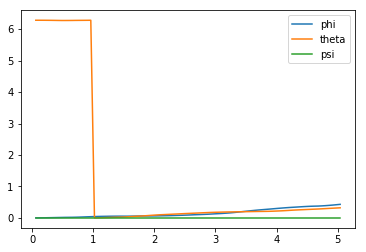

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

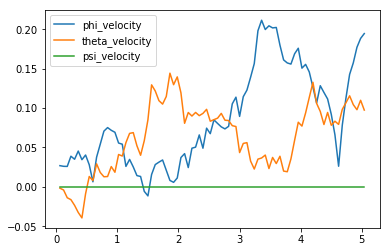

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

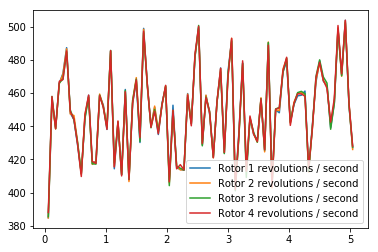

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -9.55734384  10.13308976  27.85463878   0.43103263   0.32133261   0.        ]
[-6.99383963  7.08930376  4.10917107]
[ 0.19464187  0.09748332  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =    1, score =   0.775 (best =   0.775), noise_scale = 0.05Goal not Reached...
Goal not Reached...
Episode =    2, score =   2.906 (best =   2.906), noise_scale = 0.025Goal not Reached...
Goal not Reached...
Episode =    3, score =   2.856 (best =   2.906), noise_scale = 0.05Goal not Reached...
Goal not Reached...
Episode =    4, score =   2.913 (best =   2.913), noise_scale = 0.025Goal not Reached...
Goal not Reached...
Episode =    5, score =   2.912 (best =   2.913), noise_scale = 0.05Goal not Reached...
Goal not Reached...
Episode =    6, score =   2.908 (best =   2.913), noise_scale = 0.1Goal not Reached...
Goal not Reached...
Episode =    7, score =   2.921 (best =   2.921), noise_scale = 0.05Goal not Reached...
Goal not Reached...
Episode =    8, score =   2.923 (best =   2.923), noise_scale = 0.025Goal not Reached...
Goal not Reached...
Episode =    9, score =   2.927 (best =   2.927), noise_scale = 0.0125Goal

Episode =   78, score =   6.244 (best =   6.290), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =   79, score =   4.341 (best =   6.290), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =   80, score =   4.198 (best =   6.290), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =   81, score =   2.220 (best =   6.290), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =   82, score =   2.219 (best =   6.290), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =   83, score =   4.398 (best =   6.290), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =   84, score =   1.446 (best =   6.290), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =   85, score =   2.137 (best =   6.290), noise_scale = 3.2Goal not Reached...
Episode =   86, score =   5.915 (best =   6.290), noise_scale = 3.2Goal not Reached.

Episode =  154, score =   5.819 (best =   6.462), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  155, score =   2.368 (best =   6.462), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  156, score =   1.965 (best =   6.462), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  157, score =   1.244 (best =   6.462), noise_scale = 3.2Goal not Reached...
Episode =  158, score =   6.567 (best =   6.567), noise_scale = 1.6Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  159, score =   1.924 (best =   6.567), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  160, score =   1.463 (best =   6.567), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  161, score =   4.065 (best =   6.567), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  162, score =   2.260 (best =   6.

Episode =  229, score =   3.183 (best =   6.621), noise_scale = 3.2Goal not Reached...
Episode =  230, score =   5.904 (best =   6.621), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  231, score =   4.834 (best =   6.621), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  232, score =   2.689 (best =   6.621), noise_scale = 3.2Goal not Reached...
Episode =  233, score =   6.226 (best =   6.621), noise_scale = 3.2Goal not Reached...
Episode =  234, score =   6.324 (best =   6.621), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  235, score =   3.967 (best =   6.621), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  236, score =   3.375 (best =   6.621), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  237, score =   1.782 (best =   6.621), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  238, score =   4.144 (best =   6.621), noise_s

Episode =  306, score =   1.820 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  307, score =   3.928 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  308, score =   6.207 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  309, score =   2.115 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  310, score =   2.263 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  311, score =   5.801 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  312, score =   4.222 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  313, score =   2.186 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  314, score =   2.439 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached.

Episode =  382, score =   6.151 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  383, score =   3.444 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  384, score =   6.215 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  385, score =   6.193 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  386, score =   6.183 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  387, score =   4.388 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  388, score =   6.450 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  389, score =   5.629 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  390, score =   2.066 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  391, score =   2.143 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode = 

Episode =  459, score =   6.131 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  460, score =   3.829 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  461, score =   5.397 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  462, score =   4.326 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  463, score =   3.704 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  464, score =   3.810 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  465, score =   2.092 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  466, score =   4.300 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  467, score =   4.237 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  468, s

Episode =  536, score =   6.196 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  537, score =   2.529 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  538, score =   4.758 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  539, score =   2.184 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  540, score =   6.197 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  541, score =   1.758 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  542, score =   3.573 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  543, score =   1.409 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  544, score =   5.825 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached.

Episode =  612, score =   1.954 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  613, score =   3.835 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  614, score =   3.799 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  615, score =   2.135 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  616, score =   4.400 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  617, score =   4.327 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  618, score =   2.022 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  619, score =   4.185 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  620, score =   6.099 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  621, score =   6.140 (best

Episode =  691, score =   6.113 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  692, score =   4.228 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  693, score =   6.104 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  694, score =   6.289 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  695, score =   5.863 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  696, score =   5.629 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  697, score =   6.053 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  698, score =   1.807 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  699, score =   2.066 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  700, score =   5.585 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  701, score =   6.50

Episode =  768, score =   6.258 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  769, score =   4.211 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  770, score =   1.977 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  771, score =   1.905 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  772, score =   2.032 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  773, score =   5.869 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  774, score =   4.411 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  775, score =   6.032 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  776, score =   4.142 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  777, score =   6.248 (best

Episode =  844, score =   2.421 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  845, score =   4.184 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  846, score =   3.783 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  847, score =   4.324 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  848, score =   5.511 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  849, score =   6.164 (best =   6.726), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  850, score =   2.801 (best =   6.726), noise_scale = 3.2Goal not Reached...
Episode =  851, score =   6.975 (best =   6.975), noise_scale = 1.6Goal not Reached...
Episode =  852, score =   6.510 (best =   6.975), noise_scale = 3.2Goal not Reached...
Episode =  853, score =   6.135 (best =   6.975), noise_scale = 3.2Goal not Reached...
Episode =  854, score =   6.14

Episode =  922, score =   4.044 (best =   6.975), noise_scale = 3.2Goal not Reached...
Episode =  923, score =   6.221 (best =   6.975), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  924, score =   2.056 (best =   6.975), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  925, score =   2.922 (best =   6.975), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  926, score =   2.049 (best =   6.975), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  927, score =   4.090 (best =   6.975), noise_scale = 3.2Goal not Reached...
Episode =  928, score =   6.038 (best =   6.975), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  929, score =   3.644 (best =   6.975), noise_scale = 3.2Goal not Reached...
Episode =  930, score =   6.251 (best =   6.975), noise_scale = 3.2Goal not Reached...
Episode =  931, score =   6.581 (best =   6.975), noise_s

Episode =  998, score =   1.687 (best =   6.975), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  999, score =   2.851 (best =   6.975), noise_scale = 3.2Goal not Reached...
Episode = 1000, score =   6.244 (best =   6.975), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
from agents.agent import DDPG
DDPG_agent = DDPG(task, task.state_size, task.action_size, task.action_high, task.action_low)
DDPG_agent.train(n_episodes=2000)

Using TensorFlow backend.


Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1/2000  Reward : 20.7584 Avg Reward :20.7584 time_steps : 33
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 2/2000  Reward : 27.4612 Avg Reward :24.1098 time_steps : 33
Goal not Reached...
Episode : 3/2000  Reward : 158.0866 Avg Reward :68.7687 time_steps : 34
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 4/2000  Reward : -9.2060 Avg Reward :49.2750 time_steps : 23
Goal not Reached...
Episode : 5/2000  Reward : 154.2226 Avg Reward :70.2645 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 6/2000  Reward : 83.2144 Avg Reward :72.4229 time_steps : 23
Goal not Reached...
Episode : 7/2000  Reward : 145.9119 Avg Reward :82.9213 time_steps : 27
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 8/2000  Reward : 48.8666 Avg Reward :78.6644 time_steps : 24
Goal not Reached...
Episode : 9/2000  Reward : 187.9855 Avg Reward :90.8112 time_steps : 

Goal not Reached...
Goal not Reached...
Episode : 74/2000  Reward : 117.9865 Avg Reward :102.0204 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 75/2000  Reward : 117.6424 Avg Reward :102.2287 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 76/2000  Reward : 117.8594 Avg Reward :102.4344 time_steps : 26
Goal not Reached...
Episode : 77/2000  Reward : 167.5225 Avg Reward :103.2797 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 78/2000  Reward : 117.1917 Avg Reward :103.4580 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 79/2000  Reward : 118.5953 Avg Reward :103.6497 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 80/2000  Reward : 117.5635 Avg Reward :103.8236 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 81/2000  Reward : 67.6298 Avg Reward :103.3767 time_steps : 26
Goal not Reached...
Episode : 82/2000  Reward : 169.8512 Avg Reward :104.1874 time_steps 

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 144/2000  Reward : 50.1535 Avg Reward :151.4678 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 145/2000  Reward : 89.5548 Avg Reward :151.0409 time_steps : 22
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 146/2000  Reward : 81.5330 Avg Reward :150.5648 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 147/2000  Reward : 18.4849 Avg Reward :149.6663 time_steps : 23
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 148/2000  Reward : 74.2344 Avg Reward :149.1566 time_steps : 34
Goal not Reached...
Goal not Reached...
Episode : 149/2000  Reward : 74.7828 Avg Reward :148.6574 time_steps : 21
Goal not Reached...
Goal not Reached...
Episode : 150/2000  Reward : 26.4270 Avg Reward :147.8426 time_steps : 21
Goal not Reached...
Episode : 151/2000  Reward : 206.0327 Avg Reward :148.2279 time_steps : 37
Goal not Reached...
Episode

Goal not Reached...
Goal not Reached...
Episode : 215/2000  Reward : 175.0510 Avg Reward :147.4202 time_steps : 32
Goal not Reached...
Episode : 216/2000  Reward : 161.7841 Avg Reward :147.4867 time_steps : 26
Goal not Reached...
Episode : 217/2000  Reward : 99.5304 Avg Reward :147.2658 time_steps : 21
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 218/2000  Reward : 118.1990 Avg Reward :147.1324 time_steps : 34
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 219/2000  Reward : -13.1340 Avg Reward :146.4006 time_steps : 20
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 220/2000  Reward : 42.5504 Avg Reward :145.9286 time_steps : 24
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 221/2000  Reward : 141.9887 Avg Reward :145.9107 time_steps : 38
Goal not Reached...
Goal not Reached...
Episode : 222/2000  Reward : 119.1413 Avg Reward :145.7902 time_steps : 31
Goal not Reached...
Episode : 223/2000  Re

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 286/2000  Reward : 58.4363 Avg Reward :137.4844 time_steps : 26
Goal not Reached...
Episode : 287/2000  Reward : 202.3960 Avg Reward :137.7106 time_steps : 30
Goal not Reached...
Goal not Reached...
Episode : 288/2000  Reward : 198.1473 Avg Reward :137.9204 time_steps : 38
Goal not Reached...
Goal not Reached...
Episode : 289/2000  Reward : 107.9754 Avg Reward :137.8168 time_steps : 29
Goal not Reached...
Goal not Reached...
Episode : 290/2000  Reward : 170.1703 Avg Reward :137.9284 time_steps : 39
Goal not Reached...
Episode : 291/2000  Reward : 107.4961 Avg Reward :137.8238 time_steps : 28
Goal not Reached...
Goal not Reached...
Episode : 292/2000  Reward : 145.6428 Avg Reward :137.8506 time_steps : 30
Goal not Reached...
Episode : 293/2000  Reward : 197.8271 Avg Reward :138.0553 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 294/2000  Reward : 87.6529 Avg Reward :137.8838 tim

Goal not Reached...
Goal not Reached...
Episode : 354/2000  Reward : 109.5973 Avg Reward :131.5287 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 355/2000  Reward : 58.8796 Avg Reward :131.3240 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 356/2000  Reward : 58.7153 Avg Reward :131.1201 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 357/2000  Reward : 58.3559 Avg Reward :130.9163 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 358/2000  Reward : 109.8198 Avg Reward :130.8573 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 359/2000  Reward : 58.1476 Avg Reward :130.6548 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 360/2000  Reward : 58.4695 Avg Reward :130.4543 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 361/2000  Reward : 58.8746 Avg

Goal not Reached...
Goal not Reached...
Episode : 419/2000  Reward : 109.2576 Avg Reward :122.8734 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 420/2000  Reward : 109.7882 Avg Reward :122.8423 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 421/2000  Reward : 109.2512 Avg Reward :122.8100 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 422/2000  Reward : 109.5259 Avg Reward :122.7785 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 423/2000  Reward : 57.7100 Avg Reward :122.6247 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 424/2000  Reward : 59.1644 Avg Reward :122.4750 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 425/2000  Reward : 57.8981 Avg Reward :122.3231 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 426/2000  Reward : 58.8999 Avg Reward :122.1742 time_steps : 26
Goal

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 483/2000  Reward : 58.2569 Avg Reward :115.9220 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 484/2000  Reward : 109.4680 Avg Reward :115.9087 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 485/2000  Reward : 59.0037 Avg Reward :115.7913 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 486/2000  Reward : 58.1750 Avg Reward :115.6728 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 487/2000  Reward : 58.6817 Avg Reward :115.5557 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 488/2000  Reward : 58.9276 Avg Reward :115.4397 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 489/2000  Reward : 109.1531 Avg Reward :115.4268 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 490/2000  Reward : 58.6753 Avg

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 547/2000  Reward : 58.6469 Avg Reward :111.0628 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 548/2000  Reward : 58.2763 Avg Reward :110.9665 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 549/2000  Reward : 58.5296 Avg Reward :110.8710 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 550/2000  Reward : 59.1043 Avg Reward :110.7769 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 551/2000  Reward : 58.9904 Avg Reward :110.6829 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 552/2000  Reward : 58.4001 Avg Reward :110.5881 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 553/2000  Reward : 109.9405 Avg Reward :110.5870 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 554/2000  R

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 611/2000  Reward : 58.8117 Avg Reward :107.0626 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 612/2000  Reward : 58.8738 Avg Reward :106.9838 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 613/2000  Reward : 58.1178 Avg Reward :106.9041 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 614/2000  Reward : 109.3960 Avg Reward :106.9082 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 615/2000  Reward : 58.6254 Avg Reward :106.8297 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 616/2000  Reward : 58.9256 Avg Reward :106.7519 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 617/2000  Reward : 58.3803 Avg Reward :106.6735 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 618/2000  R

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 675/2000  Reward : 58.7939 Avg Reward :103.5913 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 676/2000  Reward : 58.8536 Avg Reward :103.5252 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 677/2000  Reward : 109.0326 Avg Reward :103.5333 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 678/2000  Reward : 58.3347 Avg Reward :103.4666 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 679/2000  Reward : 58.6641 Avg Reward :103.4007 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 680/2000  Reward : 109.9199 Avg Reward :103.4102 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 681/2000  Reward : 58.2063 Avg Reward :103.3439 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 682/2000  Reward : 109.4694 Avg Reward :103.3528 t

Goal not Reached...
Goal not Reached...
Episode : 740/2000  Reward : 109.2039 Avg Reward :101.2823 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 741/2000  Reward : 58.3795 Avg Reward :101.2244 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 742/2000  Reward : 109.7291 Avg Reward :101.2359 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 743/2000  Reward : 58.8176 Avg Reward :101.1788 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 744/2000  Reward : 58.4575 Avg Reward :101.1214 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 745/2000  Reward : 109.2300 Avg Reward :101.1322 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 746/2000  Reward : 109.5471 Avg Reward :101.1435 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 747/2000  Reward : 58.7973 Avg Reward :101.0868 time_steps : 26
Goal

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 805/2000  Reward : 58.8815 Avg Reward :99.3504 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 806/2000  Reward : 58.2292 Avg Reward :99.2994 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 807/2000  Reward : 58.5335 Avg Reward :99.2489 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 808/2000  Reward : 57.8470 Avg Reward :99.1976 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 809/2000  Reward : 58.8738 Avg Reward :99.1478 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 810/2000  Reward : 58.5368 Avg Reward :99.0977 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 811/2000  Reward : 58.7156 Avg Reward :99.0479 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode :

Goal not Reached...
Goal not Reached...
Episode : 870/2000  Reward : 109.4818 Avg Reward :97.5354 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 871/2000  Reward : 58.7174 Avg Reward :97.4908 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 872/2000  Reward : 109.3666 Avg Reward :97.5044 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 873/2000  Reward : 58.2208 Avg Reward :97.4594 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 874/2000  Reward : 58.9847 Avg Reward :97.4154 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 875/2000  Reward : 58.8150 Avg Reward :97.3713 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 876/2000  Reward : 58.5349 Avg Reward :97.3269 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 877/2000  Reward : 58.5041 Avg Reward

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 935/2000  Reward : 58.5781 Avg Reward :95.9673 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 936/2000  Reward : 109.1052 Avg Reward :95.9813 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 937/2000  Reward : 58.5757 Avg Reward :95.9414 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 938/2000  Reward : 58.5350 Avg Reward :95.9015 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 939/2000  Reward : 59.0317 Avg Reward :95.8623 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 940/2000  Reward : 58.6869 Avg Reward :95.8227 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 941/2000  Reward : 58.9893 Avg Reward :95.7836 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 942/2000  Reward :

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1001/2000  Reward : 59.4651 Avg Reward :94.9660 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1002/2000  Reward : 115.6800 Avg Reward :94.9866 time_steps : 26
Goal not Reached...
Episode : 1003/2000  Reward : 173.6990 Avg Reward :95.0651 time_steps : 27
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1004/2000  Reward : 61.4279 Avg Reward :95.0316 time_steps : 28
Goal not Reached...
Episode : 1005/2000  Reward : 166.1960 Avg Reward :95.1024 time_steps : 26
Goal not Reached...
Episode : 1006/2000  Reward : 167.4057 Avg Reward :95.1743 time_steps : 26
Goal not Reached...
Episode : 1007/2000  Reward : 155.5603 Avg Reward :95.2343 time_steps : 25
Goal not Reached...
Episode : 1008/2000  Reward : 156.1970 Avg Reward :95.2947 time_steps : 25
Goal not Reached...
Episode : 1009/2000  Reward : 166.2614 Avg Reward :95.3651 time_steps : 26
Goal not Reached...
Episode : 1010/2000  Reward

Goal not Reached...
Episode : 1074/2000  Reward : 150.4519 Avg Reward :96.7592 time_steps : 28
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1075/2000  Reward : 43.1521 Avg Reward :96.7094 time_steps : 27
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1076/2000  Reward : 58.5284 Avg Reward :96.6739 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 1077/2000  Reward : 116.5745 Avg Reward :96.6923 time_steps : 27
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1078/2000  Reward : 53.9895 Avg Reward :96.6527 time_steps : 28
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1079/2000  Reward : 68.5833 Avg Reward :96.6267 time_steps : 28
Goal not Reached...
Episode : 1080/2000  Reward : 122.0201 Avg Reward :96.6502 time_steps : 22
Goal not Reached...
Goal not Reached...
Episode : 1081/2000  Reward : 103.8768 Avg Reward :96.6569 time_steps : 25
Goal not Reached...
Episode : 1082/2000  Rew

Goal not Reached...
Goal not Reached...
Episode : 1146/2000  Reward : 75.0513 Avg Reward :95.9528 time_steps : 24
Goal not Reached...
Episode : 1147/2000  Reward : 152.0023 Avg Reward :96.0017 time_steps : 27
Goal not Reached...
Episode : 1148/2000  Reward : 135.8897 Avg Reward :96.0365 time_steps : 30
Goal not Reached...
Goal not Reached...
Episode : 1149/2000  Reward : 109.1774 Avg Reward :96.0479 time_steps : 26
Goal not Reached...
Episode : 1150/2000  Reward : 146.6794 Avg Reward :96.0919 time_steps : 25
Goal not Reached...
Episode : 1151/2000  Reward : 152.8248 Avg Reward :96.1412 time_steps : 29
Goal not Reached...
Episode : 1152/2000  Reward : 167.4934 Avg Reward :96.2031 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 1153/2000  Reward : 92.0172 Avg Reward :96.1995 time_steps : 23
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1154/2000  Reward : 83.5160 Avg Reward :96.1885 time_steps : 29
Goal not Reached...
Goal not Reached...
Episode 

Goal not Reached...
Goal not Reached...
Episode : 1216/2000  Reward : 109.5285 Avg Reward :96.1058 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1217/2000  Reward : 58.3295 Avg Reward :96.0747 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1218/2000  Reward : 58.8782 Avg Reward :96.0442 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1219/2000  Reward : 108.8928 Avg Reward :96.0547 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1220/2000  Reward : 40.8495 Avg Reward :96.0095 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 1221/2000  Reward : 111.5226 Avg Reward :96.0222 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1222/2000  Reward : 107.3991 Avg Reward :96.0315 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1223/2000  Reward : 58.3905 Avg Reward :96.0007 time_steps : 26
Goal

Goal not Reached...
Goal not Reached...
Episode : 1285/2000  Reward : 109.5147 Avg Reward :96.0503 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1286/2000  Reward : 58.7490 Avg Reward :96.0213 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1287/2000  Reward : 109.4440 Avg Reward :96.0317 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1288/2000  Reward : 109.6516 Avg Reward :96.0423 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1289/2000  Reward : 58.8164 Avg Reward :96.0134 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1290/2000  Reward : 58.0549 Avg Reward :95.9840 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1291/2000  Reward : 109.4615 Avg Reward :95.9944 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1292/2000  Reward : 108.6351 Avg Reward :96.0042 time_steps : 26
Goal not Reached...
Goa

Goal Reached !
Goal Reached !
Episode : 1356/2000  Reward : 840.9221 Avg Reward :106.8149 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1357/2000  Reward : 766.6235 Avg Reward :107.3012 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1358/2000  Reward : 923.7646 Avg Reward :107.9024 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1359/2000  Reward : 937.8536 Avg Reward :108.5131 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1360/2000  Reward : 767.4621 Avg Reward :108.9976 time_steps : 84
Goal not Reached...
Episode : 1361/2000  Reward : 76.3515 Avg Reward :108.9736 time_steps : 19
Goal not Reached...
Episode : 1362/2000  Reward : 195.5766 Avg Reward :109.0372 time_steps : 69
Goal Reached !
Goal Reached !
Episode : 1363/2000  Reward : 723.2442 Avg Reward :109.4878 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1364/2000  Reward : 796.4043 Avg Reward :109.9914 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1365/2000  Reward : 951.761

Goal not Reached...
Goal not Reached...
Episode : 1430/2000  Reward : 96.4683 Avg Reward :122.2495 time_steps : 25
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1431/2000  Reward : 46.3222 Avg Reward :122.1965 time_steps : 25
Goal not Reached...
Episode : 1432/2000  Reward : 172.8145 Avg Reward :122.2318 time_steps : 28
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1433/2000  Reward : 39.5713 Avg Reward :122.1741 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 1434/2000  Reward : 102.4700 Avg Reward :122.1604 time_steps : 25
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1435/2000  Reward : 102.6991 Avg Reward :122.1468 time_steps : 30
Goal not Reached...
Episode : 1436/2000  Reward : 165.0394 Avg Reward :122.1767 time_steps : 28
Goal not Reached...
Goal not Reached...
Episode : 1437/2000  Reward : 64.4940 Avg Reward :122.1366 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1438/2

Goal not Reached...
Goal not Reached...
Episode : 1502/2000  Reward : 279.1846 Avg Reward :121.3294 time_steps : 75
Goal not Reached...
Episode : 1503/2000  Reward : 142.0136 Avg Reward :121.3432 time_steps : 25
Goal not Reached...
Episode : 1504/2000  Reward : 143.2871 Avg Reward :121.3578 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1505/2000  Reward : 100.9639 Avg Reward :121.3442 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1506/2000  Reward : 118.7917 Avg Reward :121.3425 time_steps : 28
Goal not Reached...
Goal not Reached...
Episode : 1507/2000  Reward : 79.0684 Avg Reward :121.3145 time_steps : 26
Goal not Reached...
Episode : 1508/2000  Reward : 199.5104 Avg Reward :121.3663 time_steps : 33
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1509/2000  Reward : 39.9831 Avg Reward :121.3124 time_steps : 29
Goal not Reached...
Episode : 1510/2000  Reward : 231.5035 Avg Reward :121.3854 time_steps : 33
Goal not Reached..

Goal not Reached...
Goal not Reached...
Episode : 1573/2000  Reward : 137.1218 Avg Reward :120.7320 time_steps : 34
Goal not Reached...
Goal not Reached...
Episode : 1574/2000  Reward : 136.3897 Avg Reward :120.7419 time_steps : 37
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1575/2000  Reward : 57.2887 Avg Reward :120.7016 time_steps : 29
Goal not Reached...
Episode : 1576/2000  Reward : 166.0000 Avg Reward :120.7304 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1577/2000  Reward : 139.4242 Avg Reward :120.7422 time_steps : 29
Goal not Reached...
Episode : 1578/2000  Reward : 173.6728 Avg Reward :120.7758 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1579/2000  Reward : 106.0274 Avg Reward :120.7664 time_steps : 25
Goal not Reached...
Episode : 1580/2000  Reward : 155.1909 Avg Reward :120.7882 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 1581/2000  Reward : 96.3479 Avg Reward :120.7728 time_steps : 2

Goal not Reached...
Episode : 1644/2000  Reward : 152.2445 Avg Reward :120.6385 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 1645/2000  Reward : 102.5797 Avg Reward :120.6275 time_steps : 25
Goal not Reached...
Episode : 1646/2000  Reward : 138.8686 Avg Reward :120.6386 time_steps : 22
Goal not Reached...
Episode : 1647/2000  Reward : 138.8697 Avg Reward :120.6497 time_steps : 22
Goal not Reached...
Episode : 1648/2000  Reward : 138.8697 Avg Reward :120.6607 time_steps : 22
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1649/2000  Reward : 44.0406 Avg Reward :120.6143 time_steps : 23
Goal not Reached...
Episode : 1650/2000  Reward : 138.8697 Avg Reward :120.6253 time_steps : 22
Goal not Reached...
Episode : 1651/2000  Reward : 138.8696 Avg Reward :120.6364 time_steps : 22
Goal not Reached...
Episode : 1652/2000  Reward : 138.8697 Avg Reward :120.6474 time_steps : 22
Goal not Reached...
Episode : 1653/2000  Reward : 138.8697 Avg Reward :120.65

Goal not Reached...
Episode : 1722/2000  Reward : 170.9277 Avg Reward :120.5354 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1723/2000  Reward : 52.8910 Avg Reward :120.4962 time_steps : 25
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1724/2000  Reward : 67.2449 Avg Reward :120.4653 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1725/2000  Reward : 60.4003 Avg Reward :120.4304 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 1726/2000  Reward : 110.3730 Avg Reward :120.4246 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 1727/2000  Reward : 116.3374 Avg Reward :120.4223 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1728/2000  Reward : 60.1171 Avg Reward :120.3874 time_steps : 25
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1729/2000  Reward : 43.9235 Avg Reward :120.3431 time_steps : 

Goal not Reached...
Goal not Reached...
Episode : 1795/2000  Reward : 116.0807 Avg Reward :120.6415 time_steps : 26
Goal not Reached...
Episode : 1796/2000  Reward : 138.8697 Avg Reward :120.6516 time_steps : 22
Goal not Reached...
Goal not Reached...
Episode : 1797/2000  Reward : 107.7498 Avg Reward :120.6444 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 1798/2000  Reward : 129.6758 Avg Reward :120.6495 time_steps : 28
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1799/2000  Reward : 79.8073 Avg Reward :120.6267 time_steps : 28
Goal not Reached...
Goal not Reached...
Episode : 1800/2000  Reward : 136.3730 Avg Reward :120.6355 time_steps : 29
Goal not Reached...
Episode : 1801/2000  Reward : 263.1232 Avg Reward :120.7146 time_steps : 35
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1802/2000  Reward : 57.2519 Avg Reward :120.6794 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1803

Goal not Reached...
Goal not Reached...
Episode : 1868/2000  Reward : 115.7155 Avg Reward :121.7974 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1869/2000  Reward : 69.7773 Avg Reward :121.7696 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1870/2000  Reward : 67.1203 Avg Reward :121.7403 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1871/2000  Reward : 66.4725 Avg Reward :121.7108 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1872/2000  Reward : 67.1393 Avg Reward :121.6817 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1873/2000  Reward : 48.4137 Avg Reward :121.6425 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 1874/2000  Reward : 96.5969 Avg Reward :121.6292 time_steps : 25
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1875/2000  Reward : 30.7

Goal not Reached...
Episode : 1937/2000  Reward : 154.1586 Avg Reward :121.0744 time_steps : 25
Goal not Reached...
Episode : 1938/2000  Reward : 153.6729 Avg Reward :121.0912 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 1939/2000  Reward : 103.1754 Avg Reward :121.0820 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 1940/2000  Reward : 108.7232 Avg Reward :121.0756 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1941/2000  Reward : 58.0736 Avg Reward :121.0432 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1942/2000  Reward : 62.9879 Avg Reward :121.0133 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 1943/2000  Reward : 109.1295 Avg Reward :121.0072 time_steps : 26
Goal not Reached...
Episode : 1944/2000  Reward : 156.6926 Avg Reward :121.0255 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1945/2000  Reward : 58.7

In [11]:
## TODO: Plot the rewards
episodes, all_rewards, all_avg_rewards, cordinates, velocity,angular = zip(*DDPG_agent.training_results)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

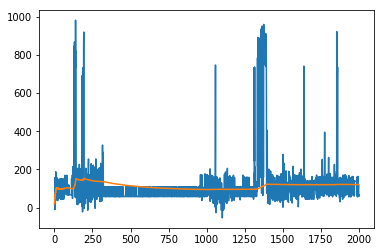

In [12]:

plt.plot(episodes, all_rewards, label='episode/rewards')
plt.plot(episodes, all_avg_rewards, label='episode/avg_rewards')
plt.show()

In [13]:
cordinates = np.array(cordinates)

cordinates.shape

(2000, 6)

(-77.727571100882173, 92.118135319481581)

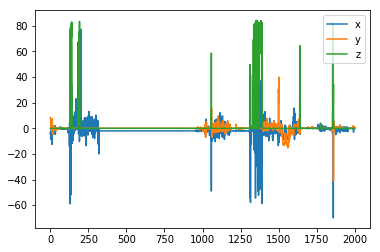

In [14]:


Xs,Ys,Zs = cordinates[:,0], cordinates[:,1], cordinates[:,2]
plt.plot(episodes, Xs, label='x')
plt.plot(episodes, Ys, label='y')
plt.plot(episodes, Zs, label='z')
plt.legend()
plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

This task is a reward based task and if the agent accomplishes the goal it receives a reward of 150 and if it is unable to reach the goal it receives penalty of -50. 

Reward function : np.tanh(1 -.3*(abs(self.sim.pose[:3]-self.target_pos[:3]))).sum() + 1.25. This function takes the absolute value of the distance the agent is from the goal, and summarized it into values between -1 to 1 using the tanh function. The greater the distance from the goal higher the penalty and closer to the goal lesser the penalty. 

For staying airborne the agent is also receiving an additional incentive of +1.25 because the goal of RL is to mazimize the cummulative reward, we have devised the strategy of rewarding it for reaching the goal and penalizing if it fails to meet it. This encourages the agent to get as close as possible and eventually trying to reach the goal for max reward. 

   

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

DDPG is an apt algorithm for this problem since the continuous space task. Unlike, Deep-Q learning or other similar algorithms  where loss function must compute probability of the taken actions under a policy, DDPG can directly maximize objectives by computing gradients of actions taken by the agent from its Critic network. 

Tuning parameters like gamma & tau doesn't have a significant impact, but in my findings changing batch_size and buffer_size can affect agent's training process. Below is the final choice of hyperparameters are:

Batch_size : 64
Buffer_size : 100000
tau : 0.01
gamma : 0.95
exploration_mu :0
exploration_theta : 0.15
exploration_sigma : 0.3
Critic lr : 1e-4
Actor lr : 1e-3

==============================================================================================================================

Details of the Actor neural network architecture
1. Actor                                                                                                                        Input(shape=(self.state_size,), name='states')  

Dense(250, activation='relu')(states)       

BatchNormalization()(net)  

Dense(100, activation='relu')(net)   

BatchNormalization()(net)  

Dense(self.action_size, activation='sigmoid' kernel_initializer=layers.initializers.TruncatedNormal(mean=0, stddev=0.1, seed=101)) (net)




==============================================================================================================================

2. Critic Neural network Architecture 

Dense(500)(states)

LeakyReLU(alpha=0.01) (s_net)

BatchNormalization()(s_net)

Dense(150)(s_net)

LeakyReLU(alpha=0.01) (s_net)

BatchNormalization()(s_net)

Dense(450)(actions)

LeakyReLU(alpha=0.01) (a_net)

BatchNormalization() (a_net)

Dense(150)(a_net)

LeakyReLU(alpha=0.01) (a_net)

BatchNormalization() (a_net)

Add() ([s_net, a_net])

LeakyReLU(alpha=0.01) (net)

Dense(1, activation=None, kernel_initializer=layers.initializers.RandomNormal(mean=0, stddev=1, seed=101))(net)



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- The task by itself is easy but like any other Machine learning problem in order to pick the right algorithm and the tuning the parameters is the challenging part, which then leads to more exploration and effort in designing and understanding the neural networks and the right architecture along with reward function which allows the agent to effectively learn and solve the task. 

- As we can observe from the learning curve that many oscillations occured in training steps, but there was a moment where the Agent gradually learned optimal policy. Despite of these oscillations and fluctuations on the learning curve, the Agent was able to reach optimaly policy. 

- The mean of last 10 episodes shows that it is safe to assume that the Agent has reached its goal and has improved much since the first episodes. Gradual progression towards a higher reward is observed.

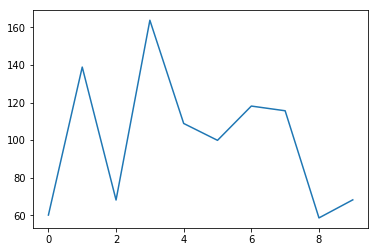

In [16]:
last_10_results = all_rewards[-10:]
plt.plot(np.arange(10), last_10_results)
plt.show()


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: 
- Understanding the math behind DDPG was the hardest part of this problem, and building an intuition for these math heavy algorithms is hard. 

- Yes, when the Agent has reached the goal many times and received fairly decent rewards, the agent could still fall into local mazimums of objective function to another local maximums that weren't as high as local maximum where the Agent was before. 

